# import important library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load data

In [2]:
df=pd.read_csv("1_T72_01.csv")
df

,time,Fx,Fy,Fz
0,0.00000,-0.000246,-0.000191,-0.001684
1,0.00005,0.000315,0.000290,-0.002486
2,0.00010,0.000315,0.000049,-0.001844
3,0.00015,0.000395,0.000611,-0.001684
4,0.00020,-0.000487,0.000852,-0.000881
...,...,...,...,...
225995,11.30000,0.075029,0.679890,1.326700
225996,11.30000,0.077800,0.684740,1.320700
225997,11.30000,0.079219,0.689170,1.322800
225998,11.30000,0.075280,0.693900,1.322800


In [3]:
df.isnull().any()

time    False
Fx      False
Fy      False
Fz      False
dtype: bool

# select features

In [4]:
X=df[['Fx', 'Fy' ,'Fz']]

In [5]:
X

,Fx,Fy,Fz
0,-0.000246,-0.000191,-0.001684
1,0.000315,0.000290,-0.002486
2,0.000315,0.000049,-0.001844
3,0.000395,0.000611,-0.001684
4,-0.000487,0.000852,-0.000881
...,...,...,...
225995,0.075029,0.679890,1.326700
225996,0.077800,0.684740,1.320700
225997,0.079219,0.689170,1.322800
225998,0.075280,0.693900,1.322800


In [6]:
X.mean()

Fx   -0.377022
Fy    0.288526
Fz    0.792433
dtype: float64

In [7]:
X.std()

Fx    0.512186
Fy    0.481627
Fz    0.939845
dtype: float64

# Scale features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 0.73562562, -0.59946307, -0.84494573],
       [ 0.73672185, -0.59846375, -0.84579928],
       [ 0.73672185, -0.59896318, -0.84511629],
       ...,
       [ 0.8907756 ,  0.83185707,  0.56431465],
       [ 0.88308501,  0.84167796,  0.56431465],
       [ 0.88099983,  0.84971324,  0.56165463]], shape=(226000, 3))

In [10]:
X_scaled.mean(axis=0)

array([-4.82917541e-17,  3.21945027e-17, -9.65835082e-17])

In [11]:
X_scaled.std(axis=0)

array([1., 1., 1.])

# apply KMeans

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster']= kmeans.fit_predict(X_scaled)

In [13]:
df

,time,Fx,Fy,Fz,cluster
0,0.00000,-0.000246,-0.000191,-0.001684,0
1,0.00005,0.000315,0.000290,-0.002486,0
2,0.00010,0.000315,0.000049,-0.001844,0
3,0.00015,0.000395,0.000611,-0.001684,0
4,0.00020,-0.000487,0.000852,-0.000881,0
...,...,...,...,...,...
225995,11.30000,0.075029,0.679890,1.326700,1
225996,11.30000,0.077800,0.684740,1.320700,1
225997,11.30000,0.079219,0.689170,1.322800,1
225998,11.30000,0.075280,0.693900,1.322800,1


# identify matching cluster

In [14]:
cluster_means = df.groupby('cluster')[['Fx','Fy','Fz']].mean()

In [15]:
cluster_means

,Fx,Fy,Fz
cluster,,,
0,-0.138866,-0.046138,0.225617
1,-0.599667,0.601392,1.322329


***cluster with highest means***

In [16]:
machining_cluster = cluster_means.mean(axis=1).idxmax()

In [17]:
machining_cluster

np.int32(1)

# Get start and end times

In [18]:
machining_data= df[df['cluster']==machining_cluster]
start_time = machining_data['time'].iloc[0]
end_time = machining_data['time'].iloc[-1]

In [19]:
machining_data

,time,Fx,Fy,Fz,cluster
60905,3.0452,-0.322760,0.51959,0.34329,1
60929,3.0465,-0.406310,0.54768,0.38612,1
60953,3.0476,-0.496050,0.59174,0.43727,1
60954,3.0477,-0.237110,0.66573,0.15277,1
60960,3.0480,-0.131830,0.64324,0.38665,1
...,...,...,...,...,...
225995,11.3000,0.075029,0.67989,1.32670,1
225996,11.3000,0.077800,0.68474,1.32070,1
225997,11.3000,0.079219,0.68917,1.32280,1
225998,11.3000,0.075280,0.69390,1.32280,1


# visualization

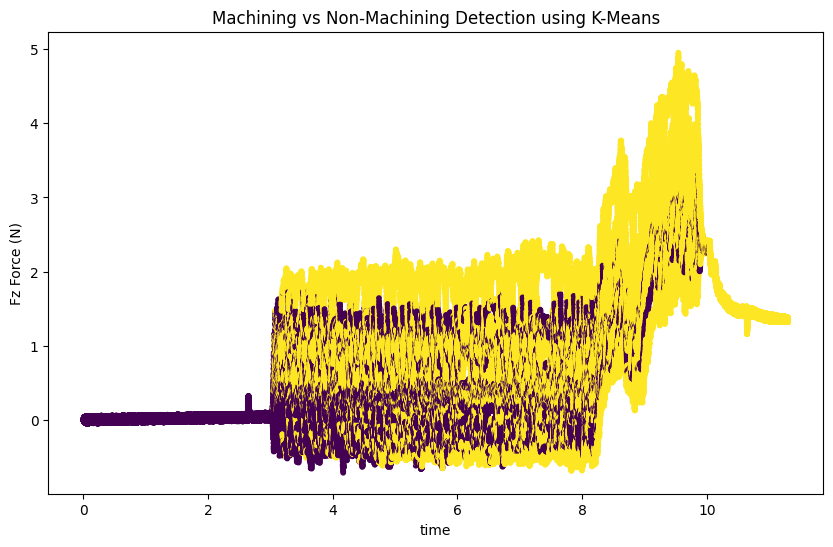

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['time'],df['Fz'],c=df['cluster'],cmap='viridis',s=10)
plt.xlabel("time")
plt.ylabel("Fz Force (N)")
plt.title("Machining vs Non-Machining Detection using K-Means")
plt.show()

In [21]:
start_time

np.float64(3.0452)

In [22]:
end_time

np.float64(11.3)